# Classification with KNN, Logistic Regression, Random Forest and SVM

<img src="class.png" />

*Machine Learning Model is trying to classify dogs and cats. (Binary Classification)*

**I'll go through a code of *classification*. *Heart disease* data will be used in this notebook.**

Side Note: Detailed informations about concepts (Algorithms, hyperparameter tuning, cross-validation etc. explanation) will be on Medium Story...


Note: Since this is a small kaggle dataset based on UCI dataset, Significant information regarding relevant real world problems can't be received probably. And in model validation section, very high accuracy can be occur.


This notebook aims for practicing classification algorithms, cross-validation and others...

First, download the dataset from *https://www.kaggle.com/ronitf/heart-disease-uci* 



Then, to work with data, *import* the dataset first!

In [174]:
import pandas as pd

In [175]:
df = pd.read_csv("heart-disease.csv")

Since, csv file is in the same file with ipynb file, there is no need to state any file name for that case.Only the csv name is written in read_csv function.

Now, data is imported and it's ready for action!
Imported dataset's first 5 rows:

In [176]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Great! But what to do with all these features? For example what does *thalach* related to? How about *oldpeak*? Some features are understandable from its name (*age*) but other features may look confusing.

To overcome that kind of confusion, further information for features, should be examined from the website where dataset is from.

More feature information can be seeked in https://www.kaggle.com/ronitf/heart-disease-uci.

### Feature Information

* age
* sex 1:male, 0:female
* cp = chest pain type (4 values):
 Value 0: typical angina
 Value 1: atypical angina
 Value 2: non-anginal pain
 Value 3: asymptomatic 
* trestbps = resting blood pressure
* chol = serum cholestoral in mg/dl
* fbs = fasting blood sugar > 120 mg/dl
* restecg = resting electrocardiographic results (values 0,1,2)
* thalach = maximum heart rate achieved
* exang = exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* slope = the slope of the peak exercise ST segment
* ca = number of major vessels (0-3) colored by flourosopy
* thal = 3 : normal; 6 : fixed defect; 7 : reversable defect

Now, features seems more meaningful. Extra information can be received from official UCI site https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

## 1. Checking for Missing Values

First things first, missing values should be handled if there exists any.

How can missing values be detected? It'll be hard to look manually and search by eye. Since our dataset is not small that option will not be considered.

Missing values can be checked by using *isna()* function.

In [178]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


That's a lot of boolean values there. "False" means that, corresponding value is not null.

How many *total* missing values in our dataset?

It can be simply found with *sum()* function;

In [179]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the result, dataset does not contain any single missing value. Actually, this situation saved us by typing more codes to handle missing values. But, what if dataset contains missing value? What to do in that case? Null values should be replaced in a logical way. Since, it's outside the scope of this notebook, this case will not be covered in this notebook. In other notebooks, methods for dealing with missing values will be shown.

## 2. Plotting for Correlations

Before jumping on to model training section, data and data correlations must be known. To get more information about data, how our features relate to each other can be looked and their relationship can be visualized.

pyplot from matplotlib must be imported for plotting. Then, our features can be plotted for seeing their relationship.

In [180]:
import matplotlib.pyplot as plt


The Seaborn library is imported for better visuals. Further in notebook it'll be used for heatmap.

In [181]:
import seaborn as sns
sns.set() 

Before, correlations between our independent features are looked target variable's distribution can be visualized. See how its values are spreaded. How many 0's and 1's are there? 

Count of values in target can be calculated by simply applying value_counts() function;

In [182]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

This means approximately 54.5% of patients have heart disease. And other 45.5% don't have heart disease.

Visualizing this information to get a better understanding;

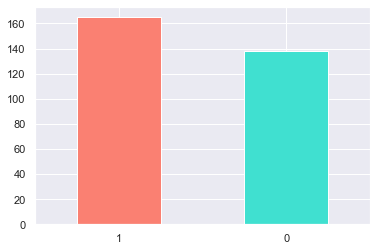

In [183]:
df["target"].value_counts().plot(kind="bar", rot=0, color=["salmon", "turquoise"]) 
#rot=0 set labels vertical. No rotation.
#kind="bar" presents our graph in the form of a bar graph.

Before moving on to feature relationships, feature variable - target variable relationships might be examined. For instance, which gender is more prone to have heart disease according to our dataset? 

In [184]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


To get more understanding, visualize it!

<Figure size 432x288 with 0 Axes>

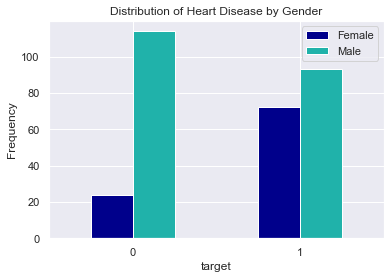

In [185]:
plt.figure()
pd.crosstab(df["target"],df["sex"]).plot(kind="bar", color=["darkblue", "lightseagreen"], rot=0)
plt.title("Distribution of Heart Disease by Gender")
plt.legend(["Female","Male"])
plt.ylabel("Frequency")
plt.show()


As can be seen from the graph, females are more tend to have heart disease. 75% of our female patients have heart disease while there is approximately 44.9% of men that have heart disease.

Another comparison would be between chest pain type and target variable. 

In [186]:
pd.crosstab(df["target"], df["cp"])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


<Figure size 432x288 with 0 Axes>

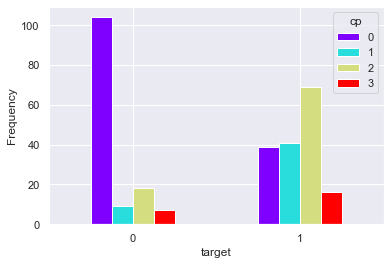

In [187]:
plt.figure()
pd.crosstab(df["target"], df["cp"]).plot(kind="bar", rot=0, cmap = "rainbow")
plt.ylabel("Frequency")
plt.show()

* 72.7% of patients with chest pain type 0 don't have heart disease. 
* 82% of patients with chest pain type 1 have heart disease. 
* 79.3% of patients with chest pain type 2 have heart disease. 
* Unfortunately, there is small amount of patients who have chest pain type 3. So, it will be wrong if statistical percentages are stated.

ECG results and target results are compared. Interesting results might be drawn from this comparison.

In [188]:
pd.crosstab(df["target"], df["restecg"])

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


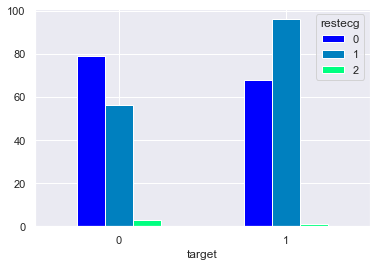

In [189]:
pd.crosstab(df["target"], df["restecg"]).plot(kind="bar", rot=0, cmap="winter")

First of all, from all of patients there is only 4 people who has restecg value of 2. Approximately 63.2% of restecg type 1 patients have heart disease. On the other hand, for restecg type 0 situation is like fifty-fifty. Roughly 46% of restecg type 0 patients have heart disease.

With visualizing independent variable and target variable relationship, more information received from dataset. Another comparisons can be looked just before examining models.

Moving on to features, which features should be visualized? 
Features that have relationship between them should be visualized. From feature information, it can be inferred that age and maximum heart rate might be correlated.

Since age and thalach features are continuous it's logical to make scatter plot to see their relationship.

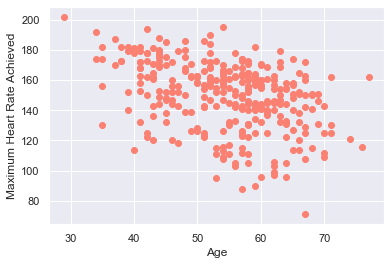

In [190]:
plt.figure()
plt.scatter(df["age"],df["thalach"], color = "salmon")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

From graph it can observed that, while age is increasing, maximum heart rate is decreasing. That means age and maximum heart rate features are negatively correlated.

Resting blood pressure and age is visualized to see if there is any correlation between them.

Text(0, 0.5, 'Resting Blood Pressure')

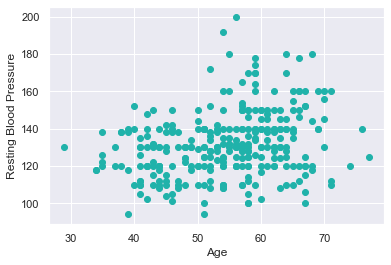

In [191]:
plt.figure()
plt.scatter(df["age"],df["trestbps"],color="lightseagreen")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")

The graph is neither increasing nor decreasing. Most of the blood pressure values are standing between 100-160 values.

For the last part of correlation plots, it would be good to see all features' correlation values between each other. For visualize that kind of plot, Seaborn's Heat Map function will be used.


Correlation matrix can be viewed by applying corr() function;

In [192]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


After that, for a better understanding, heatmap of correlation matrix is implemented.

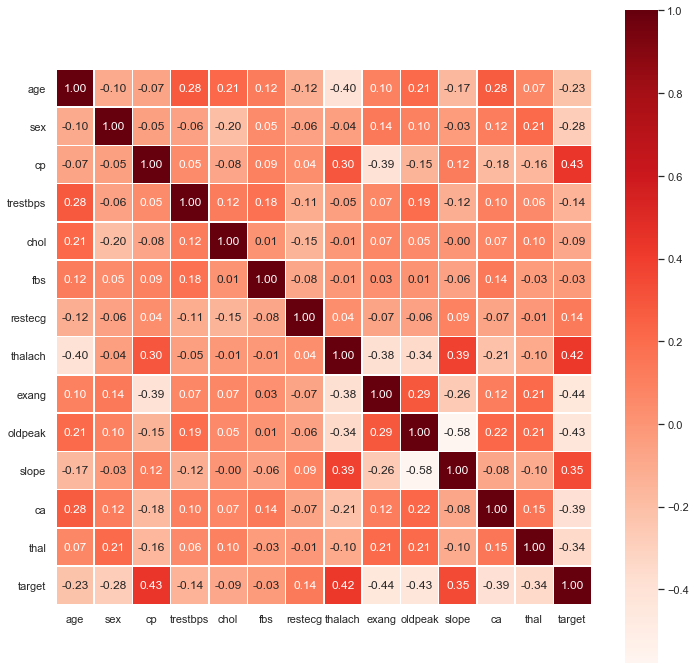

In [193]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", square=True, linewidths=0.5, cmap="Reds")
plt.show()

* Negative high values means features are negatively correlated.("thalach" and "age")
* Positive high values means features are positively correlated.
* **Important: Check for multicollinearity in high correlated values.**


## 3. Preprocessing

Since dataset has no missing values to deal with, data can be easily get ready for models to train on it.(KNN, Logistic Regression, Random Forest)

Missing values don't exist but do categorical values exist in dataset? Actually, dataset contains categorical features like "chest pain type" or "sex". But are they already in numerical format? It must be checked that if any of features are not numerical. Why? Because models can't be trained with non-numerical data, they should be transformed to numerical values.


In [194]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

As can be observed from dtype function, dataset has no non-numerical values. That's actually great...or is it? As numerical categorical features be examined, it can be seen that they're forced to be ordinal feature. It is explained in next sentences what Categorical and ordinal data is and from that, it can be inferred that how they're differ from each other. <a id='encoding'></a>

A **categorical variable** (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, "sex" feature in our data is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories. 

An **ordinal variable** is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.  For example, suppose a economic status variable exists, with three categories (low, medium and high). If low = 0, medium = 1, high = 2 are set, there would be no difference because these values are already ordered like that. In this notebook's dataset, all categorical features are *encoded* like that and that might encounter a problem because there might be more non-ordinal features like "sex".

Since our models can't figure out what "male" or "female" means, if their values set as 0 and 1, models might infer that there is an order between these values. But actually there is not! So, if this problem is not fixed, it might affect our models performance.

How it can be fixed?

It can be fixed with *encoding*.

Encoding is a method for converting categorical features into numerical type that model can understand. There is actually two most popular methods of encoding. *Label Encoding* and *One Hot Encoding*.

##### Label Encoding

*Label Encoding*, converting each value in a column to a number. Suppose that there exist a "sex" feature contains "male" and "female" instead of 0 and 1s like now. Label Encoding assigns "male" and "female" into numbers. Like "female" as 0, "male" as 1 in our case. It can be said that our "sex" feature is already Label encoded. But as already mentioned, Label encoding is only accurate for *ordinal features* (Low, Medium, High). In notebook's dataset, "sex" feature is a categorical variable, not ordinal. It must be encoded in a different manner.

##### One Hot Encoding

*One Hot Encoding* is converting categorical features into seperate binary columns as many as the number of unique values of those variables. For instance, if "cp" feature is encoded with one hot method, since there are 4 types of chest pain type in our data, One Hot Encoding would create 4 binary columns to describe that feature. Each column would have binary numbers as 1 means existence of that corresponding feature, 0 means absence of that corresponding feature. Since One Hot Encoding splits all unique values of feature, it's best method to encode *categorical features*.

###### Dummy Trap

The Dummy trap is a scenario in which the independent variables are multicollinear — a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others. 


As already mentioned, in One Hot Encoding binary columns are created for each unique values of features.  
In this case, one column would be redundant. Why? It can be more illustrative with example;  
In this notebook's dataset, a feature called "thal" has 4 different values as "0","1","2","3". If this feature is encoeded with One Hot Encoding, there would be 4 columns like "thal_0","thal_1","thal_2","thal_3". So for patients, there are 4 options, patients would have only single thal value as "1" (True). So, if one of these thal_ features is dropped would there exist any problem? Actually there wouldn't exist any problem. Suppose that thal_0 is dropped, since other thal values are all 0's in where thal_0 exists, there would be no problem for understanding that thal_0 exists.  
So, to avoid dummy trap, dummy variable is declared one less than categorical values.In "thal" scenario, number of unique categorical values was 4 (n). So, there would be 3 (n-1) dummy variables. Dummy trap can be avoided with this kind of manner.

If OneHotEncoding is applied; 

In [195]:
df_encoded = pd.get_dummies(df, columns=["sex", "cp", "thal", "ca", "slope", "exang", "restecg","fbs"], prefix=["sex", "cp", "thal", "ca", "slope", "exang", "restecg", "fbs"], drop_first = True) 
df_encoded

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,ca_1,ca_2,ca_3,ca_4,slope_1,slope_2,exang_1,restecg_1,restecg_2,fbs_1
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
299,45,110,264,132,1.2,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
301,57,130,131,115,1.2,0,1,0,0,0,...,1,0,0,0,1,0,1,1,0,0


Now, we should get ready for training model on our data.

First of all, dataset should be seperated; as X(independent variables) and y(dependent target variable).    
<a id='without_encoding'></a> 

In [196]:
X = df_encoded.iloc[:,df_encoded.columns!=5].values 
y = df_encoded.iloc[:,-5].values

Little trivia: As a naming convention in Data Science, independent features are stated as upper case 'X' while dependent target variable is stated as lower case 'y'

Dataset is seperated as X and y arrays.


In [197]:
X

array([[ 63., 145., 233., ...,   0.,   0.,   1.],
       [ 37., 130., 250., ...,   1.,   0.,   0.],
       [ 41., 130., 204., ...,   0.,   0.,   0.],
       ...,
       [ 68., 144., 193., ...,   1.,   0.,   1.],
       [ 57., 130., 131., ...,   1.,   0.,   0.],
       [ 57., 130., 236., ...,   0.,   0.,   0.]])

In [198]:
y

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Before train models on data, data should be splitted as train and test sets.

Why it is important to split data as train and test sets? Wouldn't be better to train and test our model on full data? The answer is no actually. If model makes predictions on same data that it trained on it, model would recognize some patterns of data and produce values accordingly. Yes, great accuracy can be achieved on full data but when that kind of model is tested with a data which is never seen before by our model, it'll fail badly. So as it can be figured out, model should be tested with the new data which is never seen before by our model. Because, models should produce accurate predictions when it takes different inputs.

Train-test split can be done with sklearn function train_test_split()

In [199]:
from sklearn.model_selection import train_test_split

For producing same results always, seed value is set.

In [200]:
import numpy as np
np.random.seed(5)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

## 4.Model Implementation

Random Forest Classifier will be implemented first.



Further details about Random Forest will be on Medium.

First of all, Random Forest function should be imported.

In [202]:
from sklearn.ensemble import RandomForestClassifier

### Model Evaluation Function

Throughout this notebook, some actions will repeatedly be called. To avoid typing redundant lines of codes, functions are declared for that kind of repeatedly actions. 

Since more than one algorithm will be implemented, evaluation function would be handy. Also, it would be great for comparing algorithms easily.

First, import evaluation metrics:


In [203]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [204]:
def evaluatePreds(y_true, predictions):
    accuracy=accuracy_score(y_true,predictions)
    f1=f1_score(y_true, predictions)
    precision=precision_score(y_true, predictions)
    recall=recall_score(y_true, predictions)
    scores = {"accuracy":accuracy,# (#TRUE PREDICTIONS/#SAMPLES)
              "f1 score":f1, # F1 = 2 * (precision * recall) / (precision + recall)
              "precision score": precision, # tp / (tp + fp) 'tp:truepositive, fp:falsepositive'
              "recall score": recall} # tp / (tp + fn) 'fn:falsenegative'
    return scores

Since, classification problem is dealt, prediction values' distribution among 0s and 1s must be known. It must be known that if our model predicts a heart disease value of normally "True" as "False".

It can't be looked one by one. That would be nonsense. In this kind of situation Confusion Matrix shows up... It'll visualize how our model classifies data.

For a better understanding, confusion matrix is visualized as heatmap.

Since more than one algorithms are implemented, it would be nice to have a "confusion matrix plot" function to call multiple times. So, a function for plotting confusion matrix is created like we did in evaluation situation.

In [205]:
from sklearn.metrics import confusion_matrix

In [206]:
def plotconf(y_true, predictions, title="Confusion Matrix"):
    
    plt.figure()
    sns.heatmap(confusion_matrix(y_true, predictions), annot=True, square=True, cmap="Reds",
                xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
    plt.title(title)
    plt.xlabel("Predictions")
    plt.ylabel("Actual Values")
    plt.show()


### Random Forest Classifier

Random Forest is a ensemble algorithm. As it can be figured out by its name, it runs several decision trees and take average of their outputs. This method is called "bootstrap aggregating". Also, another methods like "Boosting" exists in ensemble algorithms. XGBoost is a example of ensemble algorithm with boosting method. Since, XGBoost will not be covered in this notebook, it would not be declared detailed.

For more information about RF Classifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### Hyperparameter Tuning

In Random Forest, there are many hyperparameters and that means too many options.  
Hyperparameters have default values, but running RF with default values of hyperparams might not give the peak performance of model.  
Hyperparameters should be chosen such that the performance should be best when the model is operated with that parameter combination.  
To find such hyperparameter combination, *RandomizedSearchCV* and *GridSearchCV* algorithms can be used.


In [207]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Function for *RandomizeSearchCV* and *GridSearchCV* is defined. Because, It would be nice to get rid of extra lines of code in case of *RandomizedSearchCV* and *GridSearchCV* would be used for more than one algorithm.

In [208]:
def randomizedSearch(estimator,grid,X_train,X_test,y_train,y_test,cv=5,n_iter=10):
    rs = RandomizedSearchCV(estimator=estimator,
                            param_distributions=grid,
                            n_iter=n_iter,
                            cv=cv,
                            verbose=2)
    rs.fit(X_train, y_train)
    print(f"Randomized Search Predictions on Train Data: {rs.score(X_train, y_train)}")
    print(f"Randomized Search Predictions on Test Data: {rs.score(X_test, y_test)}")
    print("According to Randomized Search Best Hyperparameters are;")
    print(rs.best_params_)

*RandomizedSearchCV* will operate a randomize search on given hyperparameters. It would train the model **(Number of iterations * fold number of cross validation)** times. Since, number of iterations can be given as parameters, it would be less time consuming then *GridSearchCV* though GridSearchCV train the model for all combinations.

In [209]:
def gridSearch(estimator, grid, X_train, X_test, y_train, y_test, cv=5):
    gs = GridSearchCV(estimator=estimator,
                      param_grid=grid,
                      cv=cv,
                      verbose=2)
    gs.fit(X_train, y_train)
    print(f"Grid Search Predictions on Train Data: {gs.score(X_train, y_train)}")
    print(f"Grid Search Predictions on Test Data: {gs.score(X_test, y_test)}")
    print("According to Grid Search Best Hyperparameters are;")
    print(gs.best_params_)

*GridSearchCV* will operate an exhaustive search over specified parameter values for an estimator. It would train the model **(Number of combination candidates * fold number of cross validation)** times.

In [210]:
clf = RandomForestClassifier(n_jobs=-1)

Our model will be fitted with different hyperparameters. First, RandomizedSearch is applied to get rough information about our hyperparams.

In [211]:
grid_forest = {"n_estimators":[200],
               "min_samples_leaf":[10,15,20],
               "max_depth":[20,25,30,35,40],
               "min_samples_split":[10,15,20],
               "random_state":[0],
               "criterion":["entropy","gini"]}

In [212]:
randomizedSearch(clf,grid_forest,X_train,X_test,y_train,y_test); # ";" can be removed for viewing output.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini, total=   1.9s
[CV] random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini, total=   0.4s
[CV] random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini 
[CV]  random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini, total=   0.4s
[CV] random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini 
[CV]  random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini, total=   0.4s
[CV] random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini 
[CV]  random_state=0, n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_depth=25, criterion=gini, total=   0.4s
[CV] random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=15, max_depth=30, criterion=gini 
[CV]  random_state=0, n_estimators=200, min_

[CV]  random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=20, max_depth=20, criterion=gini, total=   0.4s
[CV] random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=20, max_depth=20, criterion=gini 
[CV]  random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=20, max_depth=20, criterion=gini, total=   0.4s
[CV] random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=20, max_depth=20, criterion=gini 
[CV]  random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=20, max_depth=20, criterion=gini, total=   0.5s
[CV] random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=20, max_depth=20, criterion=gini 
[CV]  random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=20, max_depth=20, criterion=gini, total=   0.4s
[CV] random_state=0, n_estimators=200, min_samples_split=15, min_samples_leaf=20, max_depth=20, criterion=gini 
[CV]  random_state=0, n_estimators=200, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.6s finished


Randomized Search Predictions on Train Data: 0.9955947136563876
Randomized Search Predictions on Test Data: 1.0
According to Randomized Search Best Hyperparameters are;
{'random_state': 0, 'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 25, 'criterion': 'entropy'}


"Fitting 5 folds for each of 10 candidates, totalling 50 fits". Cross-Validation value is set to 5 and Number of Iteratons to 10 by default. Randomized Search function is doing totally 50 fits(5*10).

Actually, our Random Forest did very well on both Train and Test data. It didn't miss any value in Test Data. That's  with hyperparameters such as :

{'random_state': 0, 'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 25, 'criterion': 'entropy'}

Best scores were reached with RandomizedForest. There is no need to run GridSearch anymore.

*Important note about perfect accuracy in Test Data*: Since our dataset is small and not encapsulating wide range of values, train and test set might be similar. That kind of accuracy (0.996) in training data usually indicates that overfit is occuring. But since model has perfect accuracy on validation data, this overfit situation doesn't concern our model for now. Because, there is no such real test data to test models. <a id='note'></a>

In [213]:
grid_forest = {"n_estimators":[200],
               "min_samples_leaf":[8,10,12],
               "max_depth":[24,25,26],
               "min_samples_split":[18,20,22],
               "random_state":[0],
               "criterion":["entropy"]}

In [214]:
gridSearch(clf, grid_forest, X_train, X_test, y_train, y_test); # ";" can be removed for viewing output.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0, total=   0.3s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=18, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=8, min_samples_split=20, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=12, min_samples_split=20, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=12, min_samples_split=20, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=12, min_samples_split=20, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=12, min_samples_split=20, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=12, min_samples_split=20, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=12, min_samples_split=20, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=12, min_samples_split=20, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=12, min_samples_split=20, n_estimators=200, random_state=0 
[CV]  criterion=entr

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=20, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=22, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=22, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=22, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=22, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=22, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=22, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=22, n_estimators=200, random_state=0 
[CV]  criterion=entr

[CV]  criterion=entropy, max_depth=26, min_samples_leaf=8, min_samples_split=22, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=8, min_samples_split=22, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=8, min_samples_split=22, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=10, min_samples_split=18, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=10, min_samples_split=18, n_estimators=200, random_state=0, total=   0.4s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=10, min_samples_split=18, n_estimators=200, random_state=0 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=10, min_samples_split=18, n_estimators=200, random_state=0, total=   0.5s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=10, min_samples_split=18, n_estimators=200, random_state=0 
[CV]  criterion=entropy

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   52.7s finished


Grid Search Predictions on Train Data: 0.9955947136563876
Grid Search Predictions on Test Data: 1.0
According to Grid Search Best Hyperparameters are;
{'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 200, 'random_state': 0}


"Fitting 5 folds for each of 27 candidates, totalling 135 fits." Cross-Validation number is set to 5 and we have **(1 * 3 * 3 * 3 * 1)** options. GridSearch will carry out 135 fits(27*5).

#### Model Fitting and Predictions

Hyperparameters that come from tuning algorithms are used.

In [215]:
clf_f = RandomForestClassifier(n_jobs=-1,n_estimators=200,
                               min_samples_leaf=10,max_depth=25, 
                               min_samples_split=20, random_state=0,
                               criterion="entropy") #old ones min_samples_leaf=15, min_samples_split = 15
clf_f.fit(X_train, y_train)
print(clf_f.score(X_test,y_test))

1.0


Model's predictions in test data is assigned to a variable.

In [216]:
forest_preds = clf_f.predict(X_test)

 "evaluatePreds" function is used to see how well our model predicts from different aspects

In [217]:
forest_metrics = evaluatePreds(y_test, forest_preds)

In [218]:
forest_metrics

{'accuracy': 1.0, 'f1 score': 1.0, 'precision score': 1.0, 'recall score': 1.0}

Thos are perfect scores.

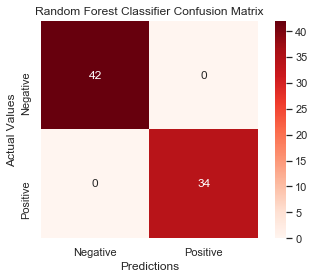

In [219]:
plotconf(y_test, forest_preds, "Random Forest Classifier Confusion Matrix")

From 76 target values, Random Forest model has classified all true.

It is explained in [this cell](#note)

### KNN

For mor information about KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Before moving in to KNN algorithm, there is extra thing which it's not used for Random Forest. That is Scaling. Features should be for a better performance.

#### Standard Scaler

*X - mu / std*


In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Cross-Validation for K Value


K-value must be tuned for a better performance. K-value stands for number of neighbors which votes on new value's prediction.

In [222]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]

for i in range(1,20):
    clf_temp = KNeighborsClassifier(n_neighbors=i)
    clf_temp.fit(X_train_sc, y_train)
    knn_preds = clf_temp.predict(X_test_sc)
    knn_scores = np.append(knn_scores,f1_score(y_test,knn_preds))
    


In [223]:
knn_scores

array([0.94117647, 0.93939394, 0.97058824, 0.93939394, 0.97058824,
       0.93939394, 0.95522388, 0.92307692, 0.93939394, 0.92307692,
       0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.93939394,
       0.92307692, 0.93939394, 0.92307692, 0.95522388])

Best k value is 3 as can seen from knn_scores.

Visualization of how "k" value affects performance of KNN;

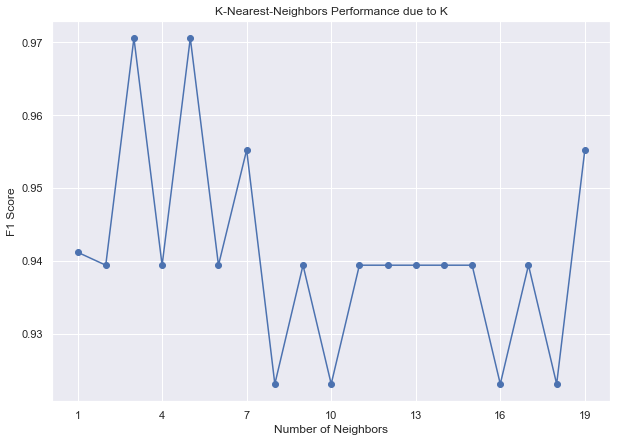

In [224]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,20), knn_scores, marker='o')
plt.xticks(np.arange(1,20,3))
plt.xlabel("Number of Neighbors")
plt.ylabel("F1 Score")
plt.title("K-Nearest-Neighbors Performance due to K")
plt.show()

Best K value is 3, KNN should be fitted with n_neighbors = 3

In [225]:
clf_knn = KNeighborsClassifier(n_neighbors=(np.argmax(knn_scores)+1))
clf_knn.fit(X_train_sc, y_train)
knn_preds = clf_knn.predict(X_test_sc)

knn_metrics = evaluatePreds(y_test, knn_preds)


In [226]:
knn_metrics

{'accuracy': 0.9736842105263158,
 'f1 score': 0.9705882352941176,
 'precision score': 0.9705882352941176,
 'recall score': 0.9705882352941176}

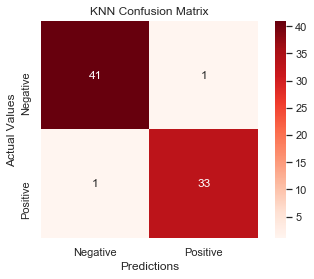

In [227]:
plotconf(y_test, knn_preds, "KNN Confusion Matrix")

From 76 target values, KNN model has missclassified only 2 values. That's quite impressing.


### Logistic Regression


For more information : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Like K value in KNN, C value should be tuned for best performance

C value is inverse of regularization strength. If C value is set too high, model can overfit while trying to catch all patterns of training. On the other hand if c value is set too low, model can underfit.

In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
model = LogisticRegression()

In [230]:
grid_log = {"C":[0.001,0.01,0.1,1,10],
           "solver":["sag","newton-cg","liblinear","lbfgs"],
           "penalty":["l2"]} #l2 l1 compatibility with solvers

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

In [231]:
gridSearch(model, grid_log, X_train_sc, X_test_sc, y_train, y_test); # ";" can be removed for viewing output.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV] .................. C=0.001, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV] .................. C=0.001, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV] .................. C=0.001, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV] .................. C=0.001, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV] .................. C=0.001, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. C=0.01, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] ................. C=0.01, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] ................. C=0.01, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] ................. C=0.01, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] ................. C=0.01, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] ................. C=0.01, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l2, solver=sag ...................................
[CV] .................... C=0.1, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.1, penalty=l2, solver=sag ...................................
[CV] .

C:\Users\erhan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\erhan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\erhan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\erhan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\erhan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

According to GridSearch, best hyperparams are; 

{'C': 1, 'penalty': 'l2', 'solver': 'sag'}


We've concluded with perfect model, It is explained in [this cell](#note)

Hyperparameters that come from tuning algorithms are used.

In [232]:
model = LogisticRegression(C=1,
                          penalty="l2",
                          solver="sag",
                          random_state=0)

model.fit(X_train_sc, y_train)
log_preds=model.predict(X_test_sc)

In [233]:
log_metrics = evaluatePreds(y_test, log_preds)

In [234]:
log_metrics

{'accuracy': 1.0, 'f1 score': 1.0, 'precision score': 1.0, 'recall score': 1.0}

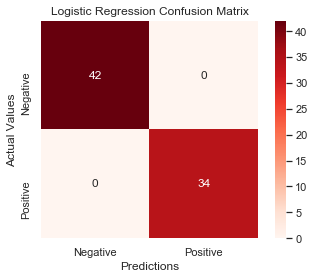

In [235]:
plotconf(y_test, log_preds, "Logistic Regression Confusion Matrix")

### SVM


C-Support Vector Classification.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [236]:
from sklearn.svm import SVC
clf_svm = SVC()
grid_svm = {"C": [0.001,0.01,0.1,1,10],
           "kernel": ["linear","sigmoid","poly","rbf"],
            "random_state": [0]
           }

gridSearch(clf_svm, grid_svm, X_train_sc, X_test_sc, y_train, y_test); # ";" can be removed for viewing output.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.001, kernel=linear, random_state=0 ..........................
[CV] ........... C=0.001, kernel=linear, random_state=0, total=   0.0s
[CV] C=0.001, kernel=linear, random_state=0 ..........................
[CV] ........... C=0.001, kernel=linear, random_state=0, total=   0.0s
[CV] C=0.001, kernel=linear, random_state=0 ..........................
[CV] ........... C=0.001, kernel=linear, random_state=0, total=   0.0s
[CV] C=0.001, kernel=linear, random_state=0 ..........................
[CV] ........... C=0.001, kernel=linear, random_state=0, total=   0.0s
[CV] C=0.001, kernel=linear, random_state=0 ..........................
[CV] ........... C=0.001, kernel=linear, random_state=0, total=   0.0s
[CV] C=0.001, kernel=sigmoid, random_state=0 .........................
[CV] .......... C=0.001, kernel=sigmoid, random_state=0, total=   0.0s
[CV] C=0.001, kernel=sigmoid, random_state=0 .........................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ................ C=0.1, kernel=rbf, random_state=0, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ................ C=0.1, kernel=rbf, random_state=0, total=   0.0s
[CV] C=1, kernel=linear, random_state=0 ..............................
[CV] ............... C=1, kernel=linear, random_state=0, total=   0.0s
[CV] C=1, kernel=linear, random_state=0 ..............................
[CV] ............... C=1, kernel=linear, random_state=0, total=   0.0s
[CV] C=1, kernel=linear, random_state=0 ..............................
[CV] ............... C=1, kernel=linear, random_state=0, total=   0.0s
[CV] C=1, kernel=linear, random_state=0 ..............................
[CV] ............... C=1, kernel=linear, random_state=0, total=   0.0s
[CV] C=1, kernel=linear, random_state=0 ..............................
[CV] ............... C=1, kernel=linear, random_state=0, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [237]:
clf_svm = SVC(C=0.1, kernel = "linear", random_state=0)
clf_svm.fit(X_train_sc, y_train)
svm_preds = clf_svm.predict(X_test_sc)

svm_metrics = evaluatePreds(y_test, svm_preds)

In [238]:
svm_metrics

{'accuracy': 1.0, 'f1 score': 1.0, 'precision score': 1.0, 'recall score': 1.0}

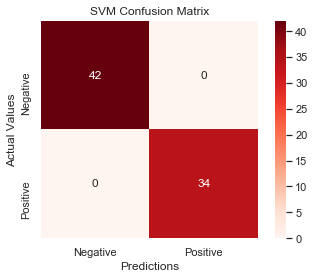

In [239]:
plotconf(y_test, svm_preds, "SVM Confusion Matrix")

### Comparison of Models

Comparison of all models that used in this notebook:

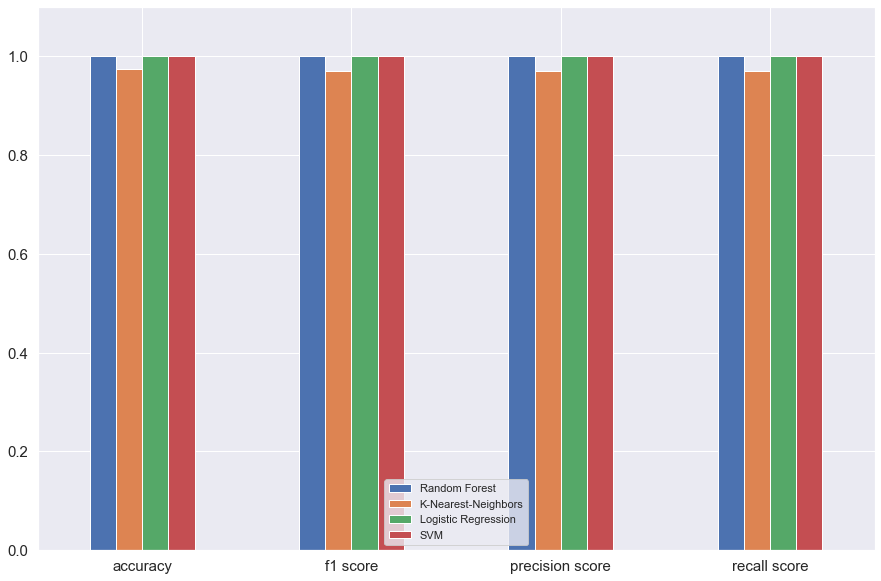

In [240]:
compare_metrics = pd.DataFrame({"Random Forest": forest_metrics,
                                "K-Nearest-Neighbors":knn_metrics,
                                "Logistic Regression":log_metrics,
                                "SVM": svm_metrics})


compare_metrics.plot(figsize=(15,10),
                     kind="bar",
                     ylim=(0,1.1),
                     fontsize=15,
                     rot=False)

## 5. Feature Importances

Feature importances are gathered for answering that kind of question;   
"which features contribute the most to the model's outcomes?"  
In our case, which features of patients have a remarkable effect on target variable outcome?


Random Forest is used for gathering feature importances;

In [241]:
feature_importances=clf_f.feature_importances_

In [242]:
features_dict = dict(zip(df_encoded.columns, list(feature_importances)))
features_dict

{'age': 0.018366498814542744,
 'trestbps': 0.012953562791479113,
 'chol': 0.015302315046778878,
 'thalach': 0.08145527150941231,
 'oldpeak': 0.12976402201389958,
 'target': 0.028688535730955804,
 'sex_1': 0.0039127707445585505,
 'cp_1': 0.006616178220978511,
 'cp_2': 0.002164461780364476,
 'cp_3': 9.664359423462886e-05,
 'thal_1': 0.003241314397323351,
 'thal_2': 0.023595708975516376,
 'thal_3': 0.011317825758334088,
 'ca_1': 0.0014639827350761807,
 'ca_2': 0.0,
 'ca_3': 0.0,
 'ca_4': 0.0,
 'slope_1': 0.28909300424987067,
 'slope_2': 0.3490539038634848,
 'exang_1': 0.014997128254409806,
 'restecg_1': 0.0074967615893733845,
 'restecg_2': 0.0,
 'fbs_1': 0.00042010992940682965}

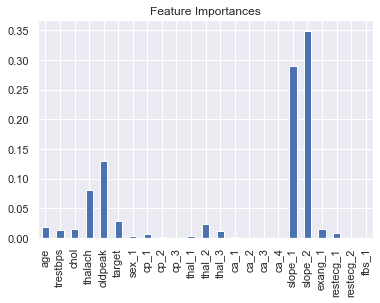

In [243]:
df_importance = pd.DataFrame(features_dict, index=[0])
df_importance.T.plot.bar(title="Feature Importances", legend=False);

As can be seen from graph, "ca" features have very low values of importance. "ca" feature can be discarded since it has no major effect on outcome. With less features, same performance.

Note about encoding: Categorical values were encoded with One Hot encoding in this notebook and it improved models' performance.  
To see the models' performance without encoding, change "df_encoded" with "df" and set slice values accordingly in [this cell](#without_encoding).  
Why values are encoded with One Hot encoding instead of Label Encoding? The answer to this question can be found [here](#encoding) in detail.